## creating a simple Linear regression model over the diabetes dataset
## by default Linear regression model is also called OLS model
## OLS --> Ordinary least Squares Model

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline


In [19]:
from sklearn import datasets
diabetes=datasets.load_diabetes()

In [20]:
df=pd.DataFrame(diabetes.data)

In [21]:
df.columns=diabetes.feature_names

In [22]:
df['diabetes_measure']=diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [23]:
df.shape

(442, 11)

In [24]:
import warnings 
warnings.filterwarnings("ignore",category=FutureWarning)

In [25]:
X=df.iloc[:,: -1]
y=df.iloc[:,-1]


Creating a Single var OLS model

In [26]:
bmi=X.iloc[:,2]
bmi=bmi[ : ,np.newaxis]

y=df.iloc[:,-1]
y=y[ : ,np.newaxis]
from sklearn.linear_model import LinearRegression
simple_lr=LinearRegression().fit(bmi,y)
predicted_y=simple_lr.predict(bmi)

In [27]:
#predicted_y

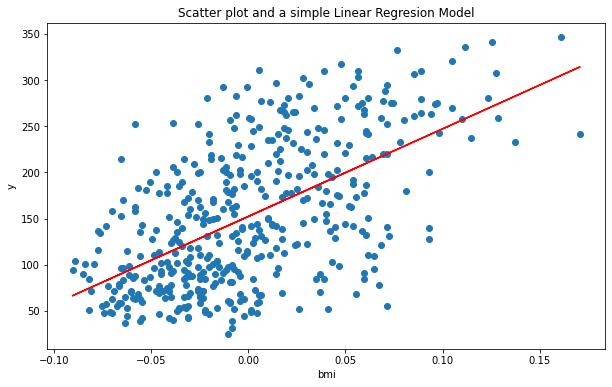

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(bmi,y)
plt.plot(bmi,predicted_y,c='r')
plt.title("Scatter plot and a simple Linear Regresion Model")
plt.ylabel("y")
plt.xlabel("bmi")
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(simple_lr,bmi,y,scoring='neg_mean_squared_error',cv=10)
print(mse)

[-3887.88568862 -3723.13170703 -4213.18191102 -3909.35846549
 -3896.1811731  -3774.68344227 -4571.55641957 -2833.03811406
 -5037.63956214 -3222.53341777]


In [30]:
print(mse.mean())
#ideal value for mse would be 0

-3906.91899010684


Multiple Linear Regression

In [31]:
multiple_lr=LinearRegression().fit(X,y)
from sklearn.model_selection import cross_val_score
mse=cross_val_score(multiple_lr,X,y,scoring='neg_mean_squared_error',cv=10)
print(mse)
print(mse.mean())

[-2533.84810936 -2870.76771141 -3512.7235093  -2759.22712936
 -3555.67794309 -2900.38041212 -3696.28187783 -2282.27959795
 -4122.9399814  -1769.68405657]
-3000.3810328390514


In [32]:
multiple_linear_coeffs=multiple_lr.coef_[0]
multiple_linear_coeffs

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

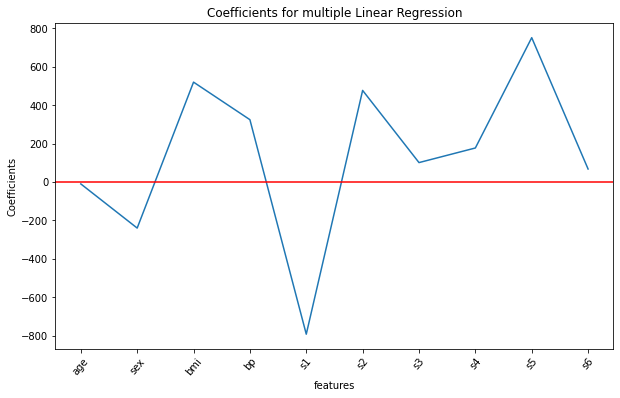

In [34]:
feature_names=df.drop('diabetes_measure',axis=1).columns
plt.figure(figsize=(10,6))
plt.plot(range(len(multiple_linear_coeffs)),multiple_linear_coeffs)
plt.axhline(0,color='r',linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for multiple Linear Regression")
plt.ylabel("Coefficients")
plt.xlabel("features")
plt.show()

In [38]:
X.corr().style.background_gradient(cmap='coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alpha_values={'alpha':[0.001,0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
gscv=GridSearchCV(Ridge(),alpha_values,scoring='neg_mean_squared_error',cv=10)
print("The Best value of alpha is", gscv.fit(X,y).best_params_)
print("The best score for the Ridge estimator is" ,gscv.fit(X,y).best_score_)

The Best value of alpha is {'alpha': 0.04}
The best score for the Ridge estimator is -2997.186793719345


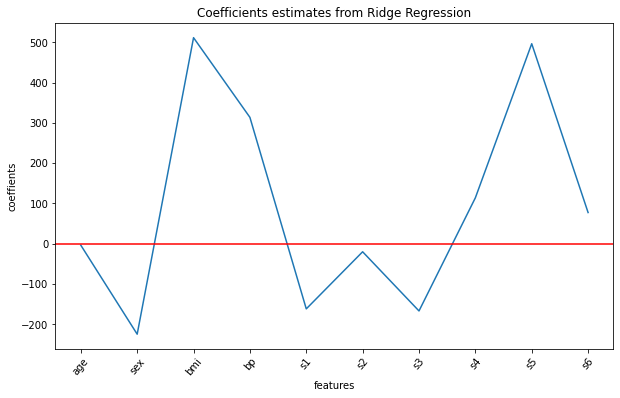

In [42]:
best_ridge_model=Ridge(alpha=0.04)
best_ridge_coeffs=best_ridge_model.fit(X,y).coef_
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_ridge_coeffs[0])
plt.axhline(0,color='r',linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients estimates from Ridge Regression")
plt.ylabel("coeffients")
plt.xlabel("features")
plt.show()
               

In [43]:
best_ridge_coeffs

array([[  -3.60964996, -224.32948213,  511.20371879,  313.55271527,
        -161.53387594,  -19.89297365, -166.67979782,  113.95024636,
         496.22227036,   77.44390618]])

LASSO Regression Regularization Techniques

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
alpha_values={'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
lasso=GridSearchCV(Lasso(),alpha_values,scoring='neg_mean_squared_error',cv=10)
print("The best value of alpha is ",lasso.fit(X,y).best_params_)
print("The best score for the best Lasso estimator is ",lasso.fit(X,y).best_score_)

The best value of alpha is  {'alpha': 0.06}
The best score for the best Lasso estimator is  -2987.4180821246437


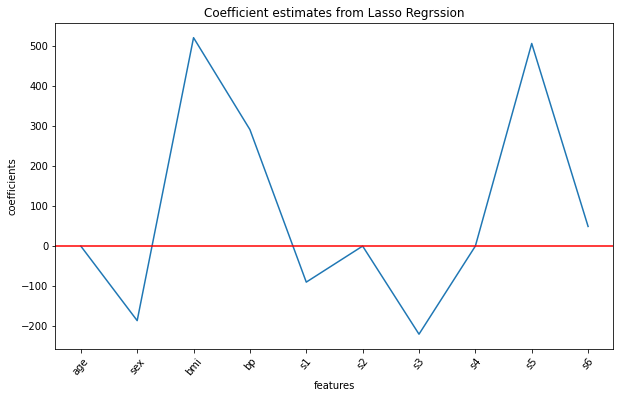

In [48]:
best_lasso_model=Lasso(alpha=0.06)
best_lasso_coeffs=best_lasso_model.fit(X,y).coef_

plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_lasso_coeffs)

plt.axhline(0,color='r',linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Lasso Regrssion")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [49]:
best_lasso_coeffs

array([  -0.        , -186.30924508,  520.89411638,  291.19604139,
        -90.06855506,   -0.        , -220.20726443,    0.        ,
        506.42221212,   49.07461404])

In [52]:
from sklearn.linear_model import ElasticNet
alpha_values={'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.95,0.99,1]}
elastic=GridSearchCV(ElasticNet(),alpha_values,scoring='neg_mean_squared_error',cv=10)


In [53]:
import warnings
warnings.filterwarnings('ignore')
elastic.fit(X,y).best_params_

{'alpha': 0.06, 'l1_ratio': 1}

In [54]:
import warnings
warnings.filterwarnings('ignore')
elastic.fit(X,y).best_score_

-2987.4180821246437

In [56]:
best_elastic_model=ElasticNet(alpha=0.06,l1_ratio=1)
best_elastic_coeffs=best_elastic_model.fit(X,y).coef_
best_elastic_coeffs

array([  -0.        , -186.30924508,  520.89411638,  291.19604139,
        -90.06855506,   -0.        , -220.20726443,    0.        ,
        506.42221212,   49.07461404])

Compare the Coefficient estimates obtained from 

In [61]:
comparing_models=pd.DataFrame({'without_regularization':multiple_linear_coeffs,
                               'Ridge':best_ridge_coeffs[0],
                               'Lasso':best_lasso_coeffs,
                               'Elastic':best_elastic_coeffs},
                              index=feature_names)
def color_red_for_zero(value):
    color='red' if value == 0 else 'black'
    return 'color: %s' % color
comparing_models=comparing_models.style.applymap(color_red_for_zero)
comparing_models

,without_regularization,Ridge,Lasso,Elastic
age,-10.012198,-3.609650,-0.000000,-0.000000
sex,-239.819089,-224.329482,-186.309245,-186.309245
bmi,519.839787,511.203719,520.894116,520.894116
bp,324.390428,313.552715,291.196041,291.196041
s1,-792.184162,-161.533876,-90.068555,-90.068555
s2,476.745838,-19.892974,-0.000000,-0.000000
s3,101.044570,-166.679798,-220.207264,-220.207264
s4,177.064176,113.950246,0.000000,0.000000
s5,751.279321,496.222270,506.422212,506.422212
s6,67.625386,77.443906,49.074614,49.074614


In [63]:
comparing_models_new=pd.DataFrame({'without_regularization':multiple_linear_coeffs,
                                   'Ridge':best_ridge_coeffs[0],
                                   'Lasso':best_lasso_coeffs},
                                  index=feature_names)
comparing_models_new.plot(figsize(10,6))
plt.axhline(0,color,='r',linestyle='solid')
plt.title("Coefficients for Linear , Ridge and Lasso Regrssion ")
plt.xlabel("coefficients")
plt.xlab

SyntaxError: invalid syntax (<ipython-input-63-c7824f3bd416>, line 6)